The **Monte Carlo Simulation** is a technique used to approximate probability of an event by running the same simulation multiple times and averaging the results,

In [1]:
import random
import numpy as np
import pylab as plt
import math


In [3]:
def roll_die():
    return random.choice([1, 2, 3, 4, 5, 6])

def check_pascal(num_trials):
    """Assumes num_trials is a positive integer. Prints an estimate of the probability of winning."""
    num_wins = 0
    for i in range(num_trials):
        for j in range(24):
            d1 = roll_die()
            d2 = roll_die()
            if d1 == 5 and d2 == 5:
                num_wins += 1
                break
    print('Probability of winning is', num_wins / num_trials)

class CrapsGame(object):
    def __init__(self):
        self.pass_wins, self.pass_losses = 0, 0
        self.dp_wins, self.dp_losses, self.dp_pushes = 0, 0, 0

    def play_hand(self):
        throw = roll_die() + roll_die()
        if throw == 7 or throw == 11:
            self.pass_wins += 1
            self.dp_losses += 1
        elif throw == 2 or throw == 3 or throw == 12:
            self.pass_losses += 1
            if throw == 12:
                self.dp_pushes += 1
            else:
                self.dp_wins += 1
        else:
            point = throw
            while True:
                throw = roll_die() + roll_die()
                if throw == point:
                    self.pass_wins += 1
                    self.dp_losses += 1
                    break
                elif throw == 7:
                    self.pass_losses += 1
                    self.dp_wins += 1
                    break

    def pass_results(self):
        return (self.pass_wins, self.pass_losses)

    def dp_results(self):
        return (self.dp_wins, self.dp_losses, self.dp_pushes)

def craps_sim(hands_per_game, num_games):
    """Assumes hands_per_game and num_games is a positive integer. Prints an estimate of the probability of winning."""
    games = []
    #play num_games games
    for t in range(num_games):
        c = CrapsGame()
        for i in range(hands_per_game):
            c.play_hand()
        games.append(c)

    #produce statistics for each game
    p_ROI_per_game, dp_ROI_per_game = [], []
    for g in games:
        wins, losses = g.pass_results()
        p_ROI_per_game.append((wins - losses)/float(hands_per_game))
        wins, losses, pushes = g.dp_results()
        dp_ROI_per_game.append((wins - losses)/float(hands_per_game))

    #produce and print summary statistics
    mean_ROI = str(round((100*sum(p_ROI_per_game)/num_games), 4)) + '%'
    sigma = str(round(100*np.std(p_ROI_per_game), 4)) + '%'
    print('Pass:', 'Mean ROI = ', mean_ROI, 'Std. Dev. =', sigma)
    mean_ROI = str(round(100*sum(dp_ROI_per_game)/num_games, 4)) + '%'
    sigma = str(round(100*np.std(dp_ROI_per_game), 4)) + '%'
    print('Don\'t pass:', 'Mean ROI = ', mean_ROI, 'Std. Dev. =', sigma)



**Return on investment** defined by the equation
$$
ROI = \frac{\text{gain from investment} - \text{cost of investment}}{\text{cost of investment}}
$$

Since the pass and don't pass lines pay even money (if you be $1 and win, you gain $1). The ROI is
$$
ROI = \frac{\text{number of wins} - \text{number of losses}}{\text{number of bets}}
$$



In [7]:
check_pascal(10)
check_pascal(100)
check_pascal(1000)

Probability of winning is 0.3
Probability of winning is 0.58
Probability of winning is 0.506


In [8]:
craps_sim(20, 10)

Pass: Mean ROI =  -2.0% Std. Dev. = 14.0%
Don't pass: Mean ROI =  -1.0% Std. Dev. = 16.0935%


In [9]:
craps_sim(20,10)

Pass: Mean ROI =  -4.0% Std. Dev. = 21.0713%
Don't pass: Mean ROI =  -0.5% Std. Dev. = 21.8461%


Looking at the mean and standard deviation for pass and don't pass it seems that neither are a safe bet. Recall that under the assumption that the distribution is normal, the 95% confidence interval is encompassed by 1.96 standard deviation on either side of the mean. For the don't pass line, the 95% confidence interval is [-0.5 - 1.96 * 21.8461, -0.5 + 1.96 * 21.8461] - roughly [-43%, 42%]

In [10]:
craps_sim(10000000, 10)

Pass: Mean ROI =  -1.4114% Std. Dev. = 0.0399%
Don't pass: Mean ROI =  -1.3666% Std. Dev. = 0.0367%


Now we can be safe in assuming neither of these would be a good bet. Suppose instead of increasing the number of hands er game, we increased the number of games

In [11]:
craps_sim(20,1000000)

Pass: Mean ROI =  -1.4466% Std. Dev. = 22.3646%
Don't pass: Mean ROI =  -1.3326% Std. Dev. = 22.0512%


In [8]:
"""
Monte Carlo simulation that estimates the cost per hour and the
standard deviation of the cost of playing 'Big 6' bets.
"""

def roll_two_dice():
    """Return the sum of two six-sided dice."""
    return roll_die() + roll_die()

def big6_bet_two_dice(bet_amount=5):
    """
    Real craps-style Big 6 bet:
      - You win if a 6 is rolled before a 7.
      - You lose if a 7 is rolled before a 6.
      - Any other sum → roll again.
    Returns +bet_amount for a win, -bet_amount for a loss.
    """
    while True:
        throw = roll_two_dice()
        if throw == 6:
            return bet_amount
        elif throw == 7:
            return -bet_amount
        # otherwise keep rolling

def simulate_hour_big6_two_dice(bet_amount=5, bets_per_hour=30):
    total = 0
    for _ in range(bets_per_hour):
        total += big6_bet_two_dice(bet_amount)
    return total

def monte_carlo_big6_two_dice(hours=10000, bet_amount=5, bets_per_hour=30):
    results = [simulate_hour_big6_two_dice(bet_amount, bets_per_hour)
               for _ in range(hours)]

    n = float(len(results))
    mean_hourly = sum(results) / n
    variance_hourly = sum((x - mean_hourly)**2 for x in results) / n
    std_hourly = variance_hourly ** 0.5

    mean_per_bet = mean_hourly / bets_per_hour
    std_per_bet = std_hourly / (bets_per_hour ** 0.5)

    return mean_hourly, std_hourly, mean_per_bet, std_per_bet, results

import numpy as np

def craps_sim_stats(hands_per_game, num_games):
    """
    Run craps_sim but return mean ROI and std dev for Pass and Don't Pass
    instead of just printing.

    Returns:
        p_mean, p_sigma, dp_mean, dp_sigma
        (all in ROI per bet, not percent)
    """
    games = []
    for t in range(num_games):
        c = CrapsGame()
        for i in range(hands_per_game):
            c.play_hand()
        games.append(c)

    p_ROI_per_game, dp_ROI_per_game = [], []
    for g in games:
        wins, losses = g.pass_results()
        p_ROI_per_game.append((wins - losses) / float(hands_per_game))

        wins, losses, pushes = g.dp_results()
        dp_ROI_per_game.append((wins - losses) / float(hands_per_game))

    p_mean = sum(p_ROI_per_game) / float(num_games)
    p_sigma = np.std(p_ROI_per_game)

    dp_mean = sum(dp_ROI_per_game) / float(num_games)
    dp_sigma = np.std(dp_ROI_per_game)

    return p_mean, p_sigma, dp_mean, dp_sigma


def big6_stats_two_dice(hours=10000, bet_amount=5, bets_per_hour=30):
    """
    Use Monte Carlo to estimate ROI per bet for Big 6.
    Returns:
        roi_per_bet, sigma_roi_per_bet
    """
    mean_h, sd_h, mean_b, sd_b, results = monte_carlo_big6_two_dice(
        hours=hours,
        bet_amount=bet_amount,
        bets_per_hour=bets_per_hour
    )
    # ROI per bet = expected profit per bet / bet_amount
    roi_per_bet = mean_b / float(bet_amount)
    sigma_roi_per_bet = sd_b / float(bet_amount)
    return roi_per_bet, sigma_roi_per_bet



In [5]:
mean_h, sd_h, mean_b, sd_b, results = monte_carlo_big6_two_dice(hours=20000)

print("Estimated mean cost per HOUR: ${:.2f}".format(mean_h))
print("Estimated SD per HOUR:       ${:.2f}".format(sd_h))
print("Estimated mean cost per BET: ${:.3f}".format(mean_b))
print("Estimated SD per BET:        ${:.3f}".format(sd_b))


Estimated mean cost per HOUR: $-13.52
Estimated SD per HOUR:       $27.15
Estimated mean cost per BET: $-0.451
Estimated SD per BET:        $4.956


Theoretical expected value (EV) for Big 6
P(sum = 6) = 5/36
P(sum = 7) = 6/36
The "race" between 6 and 7:

$$
P(\text{win}) = \frac{5}{11}
$$

$$
P(\text{lose}) = \frac{6}{11}
$$

$$
EV = 5\left(\frac{5}{11}\right) + (-5)\left(\frac{6}{11}\right)
$$

$$
EV = -\frac{5}{11} \approx -0.4545
$$


In [11]:
def theoretical_big6_ev_two_dice(bet_amount=5, bets_per_hour=30):
    p_win = 5.0 / 11.0
    p_lose = 6.0 / 11.0
    ev_per_bet = bet_amount * (p_win - p_lose)
    ev_per_hour = ev_per_bet * bets_per_hour
    return ev_per_bet, ev_per_hour

ev_bet, ev_hour = theoretical_big6_ev_two_dice()

print("Theoretical EV per BET:  ${:.4f}".format(ev_bet))
print("Theoretical EV per HOUR: ${:.2f}".format(ev_hour))
print("Monte Carlo mean per HOUR: ${:.2f}".format(mean_h))


Theoretical EV per BET:  $-0.4545
Theoretical EV per HOUR: $-13.64
Monte Carlo mean per HOUR: $-13.52


Estimated ROI per BET (negative is bad for you):
  Pass line:     -1.5180% (σ ≈ 9.7605%)
  Don't Pass:    -1.3695% (σ ≈ 9.6142%)
  Big 6 (2 dice):-8.9477% (σ ≈ 99.9305%)


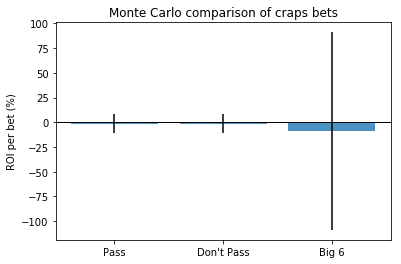

In [12]:
# --- parameters you can tweak ---
hands_per_game = 100     # number of hands per "game" in craps_sim
num_games = 2000         # how many games to simulate
hours_big6 = 20000       # how many hours to simulate for Big 6
bet_amount = 5

# 1) Get stats for Pass / Don't Pass
p_mean, p_sigma, dp_mean, dp_sigma = craps_sim_stats(
    hands_per_game, num_games
)

# 2) Get stats for Big 6
big6_mean_roi, big6_sigma_roi = big6_stats_two_dice(
    hours=hours_big6,
    bet_amount=bet_amount,
    bets_per_hour=30
)

# 3) Print numeric comparison (percent form)
print("Estimated ROI per BET (negative is bad for you):")
print("  Pass line:     {:+.4f}% (σ ≈ {:.4f}%)".format(p_mean * 100,
                                                        p_sigma * 100))
print("  Don't Pass:    {:+.4f}% (σ ≈ {:.4f}%)".format(dp_mean * 100,
                                                        dp_sigma * 100))
print("  Big 6 (2 dice):{:+.4f}% (σ ≈ {:.4f}%)".format(big6_mean_roi * 100,
                                                        big6_sigma_roi * 100))

# 4) Bar chart of mean ROI with error bars (1σ)
labels = ['Pass', "Don\'t Pass", 'Big 6']
means_pct = [p_mean * 100,
             dp_mean * 100,
             big6_mean_roi * 100]
sigmas_pct = [p_sigma * 100,
              dp_sigma * 100,
              big6_sigma_roi * 100]

x_pos = range(len(labels))

plt.figure()
plt.bar(x_pos, means_pct, yerr=sigmas_pct, align='center', alpha=0.8)
plt.xticks(x_pos, labels)
plt.axhline(0, color='black', linewidth=1)
plt.ylabel("ROI per bet (%)")
plt.title("Monte Carlo comparison of craps bets")
plt.show()



The complexity of implementation of the function craps_sim is roughly \(\theta\)(play hand)*hands_per_game*num_games - when running the code earlier on this computer it took 15 minutes to complete craps_sim(10000000, 10). The running time depends on the number of times the loop in it is executed. In principle the loop could execute an unbounded number of times since there is no bound on how long it could take to wither roll a 7 or point. There are five ways rolling an 8 (<6,2>, <2,6>, <5,3>, <3,5>, and <4,4>) and six ways of rolling a 7. So, the value of a dictionary key 8 is the value of the expression 5/11. Having this table allows us to replace the inner loop, which is contained by an unbounded number of rolls. The asymptotic complexity of this version of play_hand is O(1)

In [ ]:
def play_hand(self):
    # an alternate, aster, implementation of play_hand
    points_dict = {4:1/3, 5:2/5, 6:6/11, 8:5/11, 9:2/5, 10:1/3}
    throw = roll_die() + roll_die()
    if throw == 7 or throw == 11:
        self.pass_wins += 1
        self.dp_losses += 1
    elif throw == 2 or throw == 3 or throw == 12:
        self.pass_losses += 1
        if throw == 12:
            self.dp_pushes += 1
        else:
            self.dp_wins += 1
    else:
        if random.random() <= points_dict[throw]:
            self.pass_wins += 1
            self.dp_losses += 1
        else:
            self.pass_losses += 1
            self.dp_wins += 1